Thomas Yoo

This project is focused on figuring out which neighborhood is the best to raise a family in the city of Pittsburgh. This involves various factors such as safety, access to quality schools, and availability of family-friendly amenities like parks and playgrounds.

The metric that I am using find which neighborhood is best to raise a family is the City of Pittsburgh Playgrounds.

Lets use pandas to imports all of the playgounds in a dataset by neighborhood, park, and street. It also gives a dataset of the geogrpahical location of the playgrounds which is necessary in plotting the points for the map that I will show later on.

In [4]:
import pandas as pd
import requests
from io import StringIO

url = "https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367"

response = requests.get(url)
csv_data = StringIO(response.text)

df = pd.read_csv(csv_data)

print(df)

             id                          name  type  \
0     731501774          Able Long Playground   NaN   
1    1461276747      Albert Graham Playground   NaN   
2    1860709784             Alpine Playground   NaN   
3    1770671485              Alton Playground   NaN   
4      18942817              Ammon Playground   NaN   
..          ...                           ...   ...   
120  1199980206     Phillips Lower Playground   NaN   
121  2108783707        Duncan Park Playground   NaN   
122   675610013     McKinley Upper Playground   NaN   
123  1683700344      Liberty Green Playground   NaN   
124   311422075  Spring Garden Ave Playground   NaN   

    maintenance_responsibility                     park             street  \
0              Parks - Western           Able Long Park          COAST AVE   
1             Parks - Schenley  Albert Turk Graham Park        FORESIDE PL   
2             Parks - Northern      Alpine Gardens Park         ALPINE AVE   
3              Parks - West

Using geopandas, plt, ctx and the csv data link, I was able to code a program to create a graph that plots the points of all of the playgrounds in the city of Pittsburgh. 

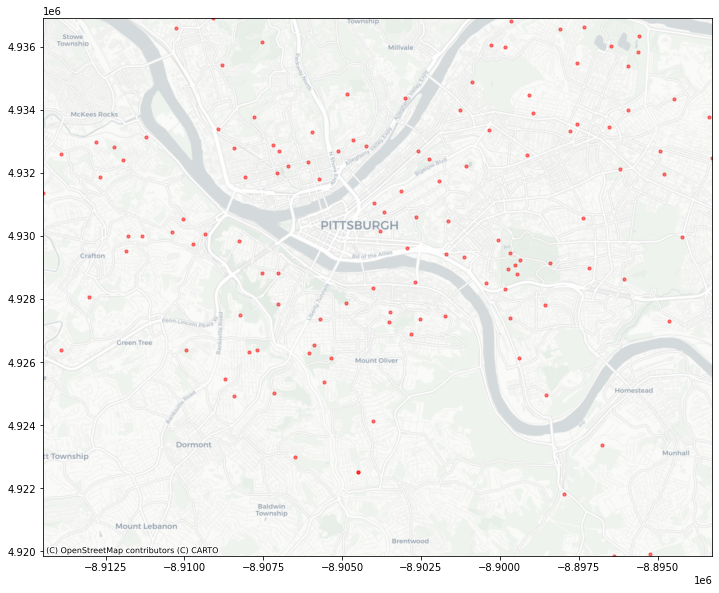

In [6]:
import pandas as pd
import geopandas as gpd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import contextily as ctx

url = "https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367"

response = requests.get(url)
csv_data = StringIO(response.text)

df = pd.read_csv(csv_data)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

gdf = gdf.to_crs("EPSG:3857")

fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(ax=ax, markersize=10, color='red', alpha=0.5)

ax.set_xlim(gdf.geometry.total_bounds[0], gdf.geometry.total_bounds[2])
ax.set_ylim(gdf.geometry.total_bounds[1], gdf.geometry.total_bounds[3])

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.show()




Using geopandas, plt, and ctx again and also the csv link for the neighborhoods I have included the neighborhood boundaries of the City of Pittsburgh to get a better idea of where all of those playgrounds are located.

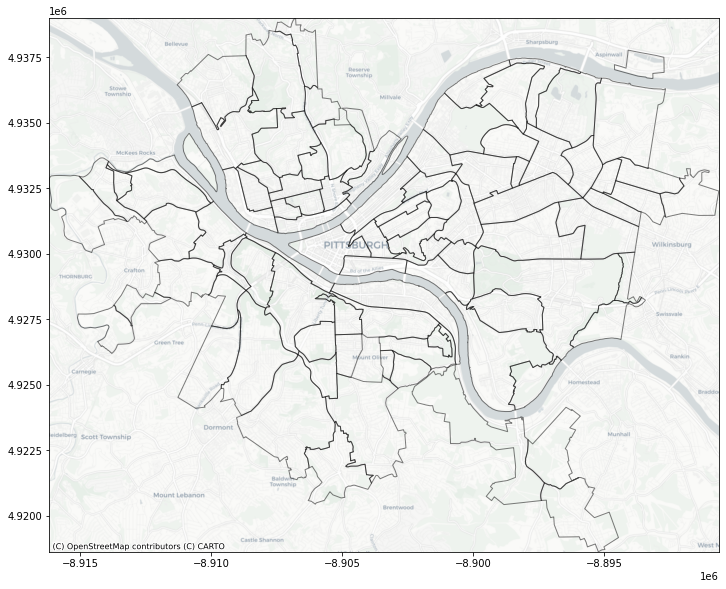

In [7]:
import pandas as pd
import geopandas as gpd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import contextily as ctx

neighborhoods_url = "https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff"

response_neighborhoods = requests.get(neighborhoods_url)
csv_data_neighborhoods = StringIO(response_neighborhoods.text)

df_neighborhoods = pd.read_csv(csv_data_neighborhoods)

url_neighborhood_boundaries = "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/pittsburghpaneighborhoods-.geojson"
gdf_neighborhood_boundaries = gpd.read_file(url_neighborhood_boundaries)

gdf_neighborhood_boundaries = gdf_neighborhood_boundaries.merge(df_neighborhoods, left_on='hood', right_on='hood')

gdf_neighborhood_boundaries = gdf_neighborhood_boundaries.to_crs("EPSG:3857")

fig, ax = plt.subplots(figsize=(12, 10))

gdf_neighborhood_boundaries.boundary.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.5)

ax.set_xlim(gdf_neighborhood_boundaries.geometry.total_bounds[0], gdf_neighborhood_boundaries.geometry.total_bounds[2])
ax.set_ylim(gdf_neighborhood_boundaries.geometry.total_bounds[1], gdf_neighborhood_boundaries.geometry.total_bounds[3])

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.show()


Lets combine those into one map!

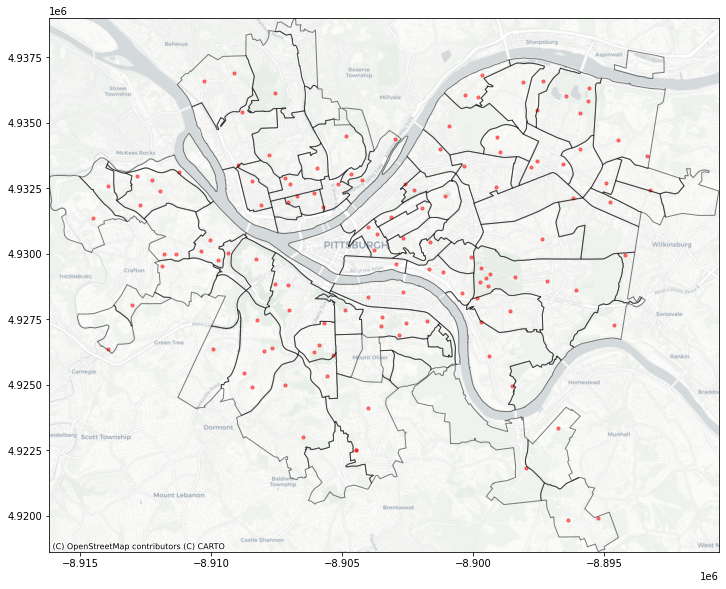

In [8]:
import pandas as pd
import geopandas as gpd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import contextily as ctx

playgrounds_url = "https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367"

response_playgrounds = requests.get(playgrounds_url)
csv_data_playgrounds = StringIO(response_playgrounds.text)

df_playgrounds = pd.read_csv(csv_data_playgrounds)

gdf_playgrounds = gpd.GeoDataFrame(df_playgrounds, geometry=gpd.points_from_xy(df_playgrounds.longitude, df_playgrounds.latitude), crs="EPSG:4326")

gdf_playgrounds = gdf_playgrounds.to_crs("EPSG:3857")

url_neighborhood_boundaries = "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/pittsburghpaneighborhoods-.geojson"

gdf_neighborhood_boundaries = gpd.read_file(url_neighborhood_boundaries)

gdf_neighborhood_boundaries = gdf_neighborhood_boundaries.to_crs("EPSG:3857")

fig, ax = plt.subplots(figsize=(12, 10))

gdf_neighborhood_boundaries.boundary.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.5)

gdf_playgrounds.plot(ax=ax, markersize=10, color='red', alpha=0.5)

ax.set_xlim(gdf_neighborhood_boundaries.geometry.total_bounds[0], gdf_neighborhood_boundaries.geometry.total_bounds[2])
ax.set_ylim(gdf_neighborhood_boundaries.geometry.total_bounds[1], gdf_neighborhood_boundaries.geometry.total_bounds[3])

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.show()



Now lets indicate which neighborhood has the most playgrounds by using a heat map by using np.

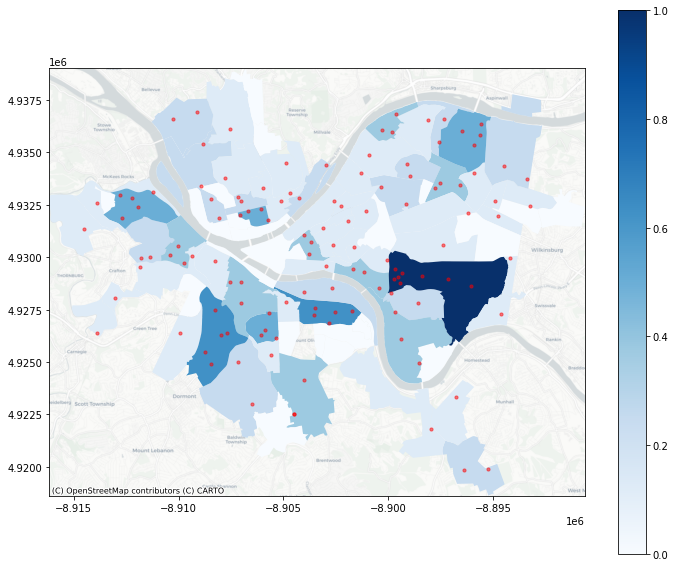

In [9]:
import pandas as pd
import geopandas as gpd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

playgrounds_url = "https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367"
url_neighborhood_boundaries = "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/pittsburghpaneighborhoods-.geojson"

df_playgrounds = pd.read_csv(playgrounds_url)

gdf_playgrounds = gpd.GeoDataFrame(df_playgrounds, geometry=gpd.points_from_xy(df_playgrounds.longitude, df_playgrounds.latitude), crs="EPSG:4326")

gdf_neighborhood_boundaries = gpd.read_file(url_neighborhood_boundaries)

gdf_playgrounds = gdf_playgrounds.to_crs("EPSG:3857")
gdf_neighborhood_boundaries = gdf_neighborhood_boundaries.to_crs("EPSG:3857")

gdf_playgrounds_neighborhoods = gpd.sjoin(gdf_playgrounds, gdf_neighborhood_boundaries, op="within", how="inner")

playground_counts = gdf_playgrounds_neighborhoods["hood"].value_counts()

gdf_neighborhood_boundaries["playground_count"] = gdf_neighborhood_boundaries["hood"].map(playground_counts).fillna(0)

gdf_neighborhood_boundaries["playground_count_normalized"] = gdf_neighborhood_boundaries["playground_count"] / gdf_neighborhood_boundaries["playground_count"].max()

cmap = plt.cm.Blues

fig, ax = plt.subplots(figsize=(12, 10))

gdf_neighborhood_boundaries.plot(column='playground_count_normalized', cmap=cmap, ax=ax, legend=True)

gdf_playgrounds.plot(ax=ax, markersize=10, color='red', alpha=0.5)

ax.set_xlim(gdf_neighborhood_boundaries.geometry.total_bounds[0], gdf_neighborhood_boundaries.geometry.total_bounds[2])
ax.set_ylim(gdf_neighborhood_boundaries.geometry.total_bounds[1], gdf_neighborhood_boundaries.geometry.total_bounds[3])

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.show()

Based on this map, you can see that Squirrel Hill South has the most playgrounds since it has the darkest shade of blue. However if you aren't a resident of the city of Pittsburgh you may not be familiar with the neighborhoods so lets use plt to make a bar graph to further prove my claim.

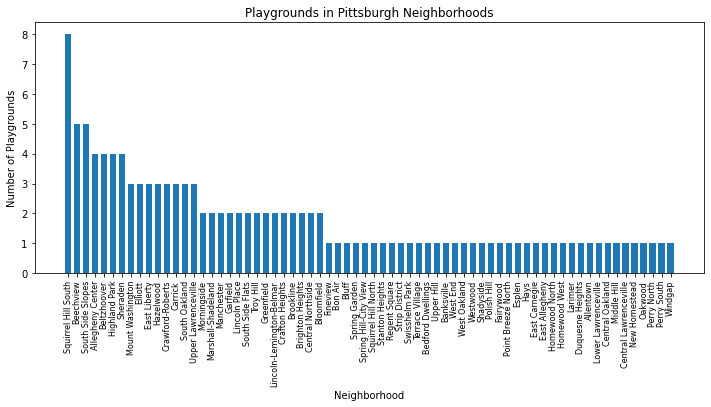

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367"
df = pd.read_csv(url)

grouped = df.groupby('neighborhood').size().reset_index(name='count')

sorted_df = grouped.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sorted_df['neighborhood'], sorted_df['count'], width=0.7)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Playgrounds')
plt.title('Playgrounds in Pittsburgh Neighborhoods')
plt.subplots_adjust(bottom=0.3)
plt.show()


As you can see, Squirrel Hill South has the most playgrounds according to the bar graph shown above. Therefore I can confidently say that Squirrel Hill South is the best Neighborhood to raise a family in the City of Pittsburgh based on my metric.